In [1]:
import sys
sys.path.insert(0, "./../../scripts")

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["font.sans-serif"] = ["PT Sans","DejaVu Sans"]

# Plot Distribution of Orientation Selectivities and Tuning Widths from Supp Fig S3a,b

In [10]:
for c_idx in range(6):
    prms = None
    rs = np.zeros((80,2,10000))
    Ls = np.zeros((80,2))
    TOs = np.zeros((80,2))
    
    with open("./../../model_data/mult_ori_id_None_c_{:d}.pkl".format(c_idx),"rb") as handle:
        this_res_dict = pickle.load(handle)
    
    prms = this_res_dict["prms"]
    prms["L"] = float(prms["L"])
    rs[:,1,:] = this_res_dict["rates"][:,1]
    Ls[:,1] = this_res_dict["Lexps"][:,1]
    TOs[:,1] = this_res_dict["timeouts"][:,1]
    
    with open("./../../model_data/mult_ori_id_None_Lx0.00_c_{:d}.pkl".format(c_idx),"rb") as handle:
        this_res_dict = pickle.load(handle)
    
    rs[:,0,:] = this_res_dict["rates"][:,1]
    Ls[:,0] = this_res_dict["Lexps"][:,1]
    TOs[:,0] = this_res_dict["timeouts"][:,1]
    
    new_res_dict = {}
    new_res_dict["prms"] = prms
    new_res_dict["rates"] = rs
    new_res_dict["Lexps"] = Ls
    new_res_dict["timeouts"] = TOs
    
    # print(new_res_dict["prms"])
    # print(new_res_dict["rates"])
    
    with open("./../../model_data/mult_ori_c_{:d}.pkl".format(c_idx),"wb") as handle:
        pickle.dump(new_res_dict,handle)

In [ ]:
sim_mult_ori_rs = np.zeros((6,80,2,10000))

for c_idx in range(6):
    with open("./../../model_data/mult_ori_c_{:d}.pkl".format(c_idx),"rb") as handle:
        res_dict = pickle.load(handle)
        
    sim_mult_ori_rs[c_idx,:,:,:] = res_dict["rates"][:,:,:]

In [ ]:
from scipy.interpolate import make_smoothing_spline

def calc_dc_ac_comp(A,axis=-1):
    if A.ndim > 1:
        A_xpsd = np.moveaxis(A,axis,-1)
    else:
        A_xpsd = A.copy()
    Nax = A.shape[axis]
    angs = np.arange(Nax) * 2*np.pi/Nax
    A0 = np.mean(A_xpsd,axis=-1)
    As = np.mean(A_xpsd*np.sin(angs),axis=-1)
    Ac = np.mean(A_xpsd*np.cos(angs),axis=-1)
    A1mod = np.sqrt(As**2+Ac**2)
    A1phs = np.arctan2(As,Ac)
    
    return A0,A1mod,A1phs

def periodic_smoothing_spline(data,n):
    return make_smoothing_spline(np.arange(-n,2*n)/n*180,np.concatenate((data,data,data)),lam=100)

def FWHM(X,Y,half_max):
    d = np.sign(half_max - Y[0:-1]) - np.sign(half_max - Y[1:])
    central_idxs = np.argsort(np.abs(0.5*(X[0:-1]+X[1:])))
    try:
        left_idx = np.where(d[central_idxs] > 0)[0][0]
        right_idx = np.where(d[central_idxs] < 0)[0][-1]
        return X[central_idxs][right_idx] - X[central_idxs][left_idx]
    except:
        return 0

In [ ]:
# from tqdm import tqdm

# oris = np.linspace(-90,90,181)[:-1]
# base_avg_doris = np.linspace(-22.5,22.5,46)

# ravg,rgos,rpo = calc_dc_ac_comp(sim_mult_ori_rs,1)
# rgos = rgos/ravg
# rpo = np.mod(rpo,2*np.pi)*180/(2*np.pi)
# rpo[rpo > 90] = rpo[rpo > 90] - 180

# rpref = np.zeros((6,2,10000))
# rorth = np.zeros((6,2,10000))
# width = np.zeros((6,2,10000))

# for i in tqdm(range(10000)):
#     for cidx in range(6):
#         for oidx in range(2):
#             itp = periodic_smoothing_spline(sim_mult_ori_rs[cidx,:,oidx,i],80)
#             def resp(x): return np.fmax(0,itp(x))
#             this_rpo = oris[np.argmax(resp(oris))]
#             rpref[cidx,oidx,i] = resp(this_rpo)
#             rorth[cidx,oidx,i] = np.mean(resp(np.mod(this_rpo+90 + base_avg_doris,180)))
#             width[cidx,oidx,i] = np.abs(FWHM(oris,itp(oris+this_rpo),0.5*(rpref[cidx,oidx,i]+rorth[cidx,oidx,i])) / (2*np.sqrt(2*np.log(2))))
    
# ros = (rpref-rorth)/(rpref+rorth)

# tune_props = {}
# tune_props["ravg"] = ravg
# tune_props["rgos"] = rgos
# tune_props["rpo"] = rpo
# tune_props["rpref"] = rpref
# tune_props["rorth"] = rorth
# tune_props["width"] = width
# tune_props["ros"] = ros

# with open("./../../model_data/tune_props.pkl","wb") as handle:
#     pickle.dump(tune_props,handle)

with open("./../../model_data/tune_props.pkl","rb") as handle:
    tune_props = pickle.load(handle)
    
ravg = tune_props["ravg"]
rgos = tune_props["rgos"]
rpo = tune_props["rpo"]
rpref = tune_props["rpref"]
rorth = tune_props["rorth"]
width = tune_props["width"]
ros = tune_props["ros"]

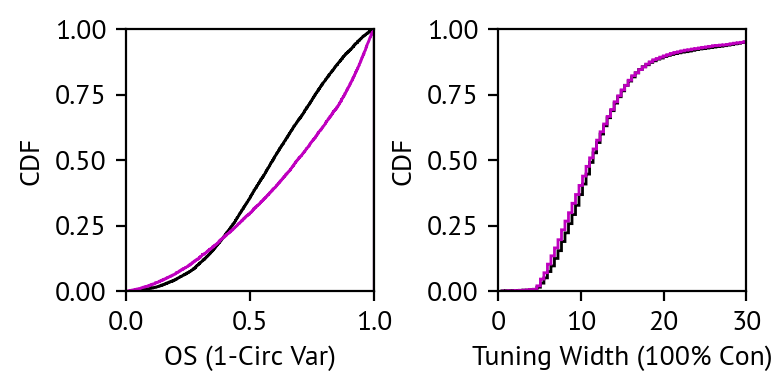

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(2.0*2,1.7*1),dpi=200,sharex=False,sharey=False)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

axs[0].hist(rgos[-1,0,:],10000,density=True,cumulative=True,histtype="step",color="k")
axs[0].hist(rgos[-1,1,:],10000,density=True,cumulative=True,histtype="step",color="m")

axs[1].hist(width[-1,0,:],10000,density=True,cumulative=True,histtype="step",color="k")
axs[1].hist(width[-1,1,:],10000,density=True,cumulative=True,histtype="step",color="m")

axs[0].set_xlabel("OS (1-Circ Var)")
axs[0].set_ylabel("CDF")

axs[1].set_xlabel("Tuning Width (100% Con)")
axs[1].set_ylabel("CDF")

axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[1].set_xlim(0,30)
axs[1].set_ylim(0,1)
axs[1].set_xticks([0,10,20,30])

# fig.tight_layout()
fig.savefig("./supp_fig_3ab.pdf")

# Plot Orientation Selectivities and Tuning Widths Without and With Opto from Supp Fig S3c,d

In [ ]:
rng = np.random.default_rng(0)
os_shuf = []
tw_shuf = []
ci_shuf = []

for i in range(100):
    os_shuf.append(rgos[-1,1,:]-rng.permuted(rgos[-1,0,:]))
    tw_shuf.append(width[-1,1,:]-rng.permuted(width[-1,0,:]))
    ci_shuf.append(width[3,0,:]-rng.permuted(width[-1,0,:]))
    
os_shuf = np.array(os_shuf).flatten()
tw_shuf = np.array(tw_shuf).flatten()
ci_shuf = np.array(ci_shuf).flatten()

os_data = rgos[-1,1,:]-rgos[-1,0,:]
tw_data = width[-1,1,:]-width[-1,0,:]
ci_data = width[3,0,:]-width[-1,0,:]

0.0
0.0


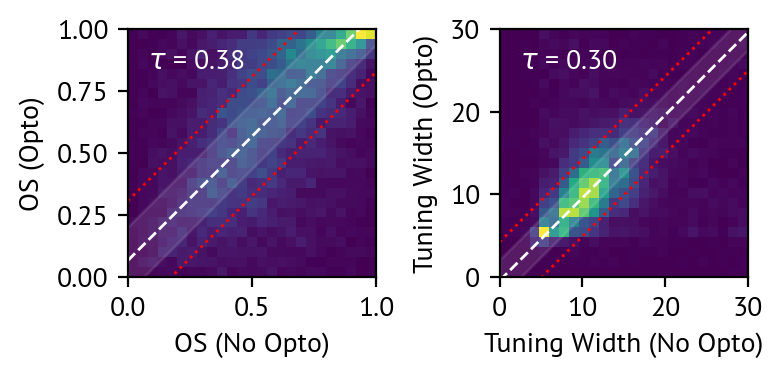

In [ ]:
from scipy.stats import kendalltau

fig,axs = plt.subplots(1,2,figsize=(2.0*2,1.7*1),dpi=200,sharex=False,sharey=False)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

axs[0].hist2d(rgos[-1,0,:],rgos[-1,1,:],np.linspace(0,1,26))
axs[1].hist2d(width[-1,0,:],width[-1,1,:],np.linspace(0,30,26))

axs[0].plot([0,1],[0+np.median(os_data),1+np.median(os_data)],"w--",lw=1)
axs[0].plot([0,1],[0+np.quantile(os_shuf,0.25),1+np.quantile(os_shuf,0.25)],"r:",lw=1)
axs[0].plot([0,1],[0+np.quantile(os_shuf,0.75),1+np.quantile(os_shuf,0.75)],"r:",lw=1)
axs[0].fill_between([0,1],[0+np.quantile(os_data,0.25),1+np.quantile(os_data,0.25)],
                      [0+np.quantile(os_data,0.75),1+np.quantile(os_data,0.75)],color="w",alpha=0.1)

axs[1].plot([0,30],[0+np.median(tw_data),30+np.median(tw_data)],"w--",lw=1)
axs[1].plot([0,30],[0+np.quantile(tw_shuf,0.25),30+np.quantile(tw_shuf,0.25)],"r:",lw=1)
axs[1].plot([0,30],[0+np.quantile(tw_shuf,0.75),30+np.quantile(tw_shuf,0.75)],"r:",lw=1)
axs[1].fill_between([0,30],[0+np.quantile(tw_data,0.25),30+np.quantile(tw_data,0.25)],
                      [0+np.quantile(tw_data,0.75),30+np.quantile(tw_data,0.75)],color="w",alpha=0.1)

taustat = kendalltau(rgos[-1,0,:],rgos[-1,1,:])
axs[0].text(0.08333333333,0.9166666667,r"$\tau$ = {:.2f}".format(taustat.statistic),
              color="w",ha="left",va="top")
print(taustat.pvalue)

taustat = kendalltau(width[-1,0,:],width[-1,1,:])
axs[1].text(2.5,27.5,r"$\tau$ = {:.2f}".format(taustat.statistic),
              color="w",ha="left",va="top")
print(taustat.pvalue)

axs[0].set_xlabel("OS (No Opto)")
axs[0].set_ylabel("OS (Opto)")

axs[1].set_xlabel("Tuning Width (No Opto)")
axs[1].set_ylabel("Tuning Width (Opto)")

axs[0].set_aspect("equal")
axs[1].set_aspect("equal")

axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[1].set_xlim(0,30)
axs[1].set_ylim(0,30)

axs[1].set_xticks([0,10,20,30])
axs[1].set_yticks([0,10,20,30])

# fig.tight_layout()
fig.savefig("./supp_fig_3cd.pdf")

# Plot Tuning Widths at Low vs High Contrast from Supp Fig S3e

0.0


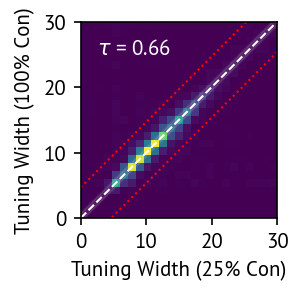

In [ ]:
from scipy.stats import kendalltau

fig,ax = plt.subplots(1,1,figsize=(2.0*1,1.7*1),dpi=150,sharex=False,sharey=False)
fig.subplots_adjust(hspace=0.5,wspace=0.5)

ax.hist2d(width[3,0,:],width[-1,0,:],np.linspace(0,30,26))

ax.plot([0,30],[0+np.median(ci_data),30+np.median(ci_data)],"w--",lw=1)
ax.plot([0,30],[0+np.quantile(ci_shuf,0.25),30+np.quantile(ci_shuf,0.25)],"r:",lw=1)
ax.plot([0,30],[0+np.quantile(ci_shuf,0.75),30+np.quantile(ci_shuf,0.75)],"r:",lw=1)
ax.fill_between([0,30],[0+np.quantile(ci_data,0.25),30+np.quantile(ci_data,0.25)],
                      [0+np.quantile(ci_data,0.75),30+np.quantile(ci_data,0.75)],color="w",alpha=0.1)

taustat = kendalltau(width[3,0,:],width[-1,0,:])
ax.text(2.5,27.5,r"$\tau$ = {:.2f}".format(taustat.statistic),
              color="w",ha="left",va="top")
print(taustat.pvalue)

ax.set_xlabel("Tuning Width (25% Con)")
ax.set_ylabel("Tuning Width (100% Con)")

ax.set_aspect("equal")

ax.set_xlim(0,30)
ax.set_ylim(0,30)

ax.set_xticks([0,10,20,30])
ax.set_yticks([0,10,20,30])

# fig.tight_layout()
fig.savefig("./supp_fig_3e.pdf")